In [1]:
%pylab inline

from __future__ import (division, print_function)

import os
import sys
import copy
import fnmatch
import warnings
import collections

import numpy as np
import scipy
try:
    from scipy.stats import scoreatpercentile
except:
    scoreatpercentile = False
from scipy.interpolate import interp1d
import cPickle as pickle

# Astropy
from astropy.io import fits
from astropy    import units as u
from astropy.stats import sigma_clip
from astropy.table import Table, Column
from astropy.utils.console import ProgressBar

# AstroML
from astroML.plotting import hist

# Matplotlib related
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import MaxNLocator
# Matplotlib default settings
rcdef = plt.rcParams.copy()
pylab.rcParams['figure.figsize'] = 12, 10
pylab.rcParams['xtick.major.size'] = 8.0
pylab.rcParams['xtick.major.width'] = 2.5
pylab.rcParams['xtick.minor.size'] = 4.0
pylab.rcParams['xtick.minor.width'] = 2.5
pylab.rcParams['ytick.major.size'] = 8.0
pylab.rcParams['ytick.major.width'] = 2.5
pylab.rcParams['ytick.minor.size'] = 4.0
pylab.rcParams['ytick.minor.width'] = 2.5

# Personal
import hscUtils as hUtil
import galSBP

Populating the interactive namespace from numpy and matplotlib


In [2]:
def readProfile(ellFile):
    """ Load the pickle format 1-D profile. """
    if os.path.isfile(ellFile):
        return pickle.load(open(ellFile, 'rb'))
    else:
        warnings.warn("!!! Can not find the Ellipse Output at %s" % 
                      ellFile )
        return None

In [3]:
location = '/Users/songhuang/work/hscs/hsc_cutout/test/127/HSC-I/default'
testFile = 'redBCG_127_HSC-I_full_psf_ellip_3.pkl'
testEll = os.path.join(location, testFile)
testSbp = readProfile

In [6]:
np.max(testSbp['sma'])

21.435890000000001

In [42]:
rad = (testSbp['sma'] ** 0.25)
sbp = - 2.5 * np.log10(testSbp['intens'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [49]:
rsma_common = np.arange(0.4, 4.1, 0.01)
intrpFunc = interp1d(rad, sbp, kind='slinear', bounds_error=False)

In [50]:
sbpInterp = intrpFunc(rsma_common)

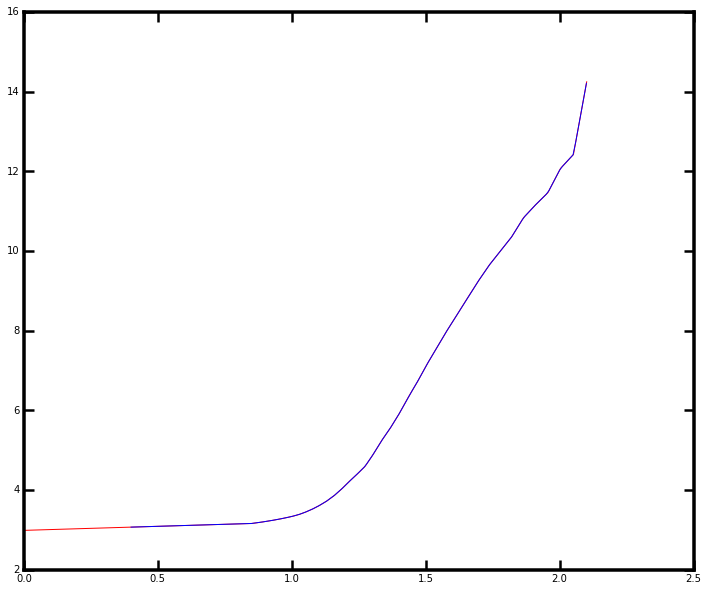

In [51]:
plt.plot(rad, sbp, c='r')
plt.plot(rsma_common, sbpInterp, c='b')

In [52]:
sbpInterp

array([  3.07062774,   3.07266096,   3.07469419,   3.07672742,
         3.07876064,   3.08079387,   3.0828271 ,   3.08486033,
         3.08689355,   3.08892678,   3.09096001,   3.09299323,
         3.09502646,   3.09705969,   3.09909291,   3.10112614,
         3.10315937,   3.1051926 ,   3.10722582,   3.10925905,
         3.11129228,   3.1133255 ,   3.11535873,   3.11739196,
         3.11942518,   3.12145841,   3.12349164,   3.12552487,
         3.12755809,   3.12959132,   3.13162455,   3.13365777,
         3.135691  ,   3.13772423,   3.13975745,   3.14179068,
         3.14382391,   3.14585714,   3.14789036,   3.14992359,
         3.15195682,   3.15399004,   3.15602327,   3.1580565 ,
         3.16008972,   3.1624086 ,   3.17131779,   3.18022699,
         3.18989827,   3.19957501,   3.21000985,   3.22053381,
         3.23175771,   3.24321973,   3.25525078,   3.26775557,
         3.28060032,   3.2942687 ,   3.30793709,   3.32303859,
         3.33816295,   3.35572613,   3.37477907,   3.39